﻿# Fashion-MNIST

好了，我们来实战演练。你将使用 [Fashion-MNIST 数据集](https://github.com/zalandoresearch/fashion-mnist)。对于神经网络来说，MNIST 的规模很小，可以轻松地达到 97% 的准确率。Fashion-MNIST 包括很多 28x28 灰色服饰图像。它比 MNIST 更复杂，也更贴近实际现实需求。

<img src='assets/fashion-mnist-sprite.png' width=500px>

你要在这个 notebook 里构建神经网络。其实你可以用 Part 3 notebook 里的代码，但是这样就学不到任何知识了。只有自己编写代码并确保代码能运行，才能实现最佳学习效果。当然，你可以参考 Part 3 notebook。

首先，通过 torchvision 加载数据集。

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz

Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz

Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz

Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

Processing...

Done!



下面是一个图像示例。

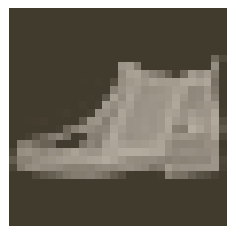

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## 构建网络

你要先定义网络。和 MNIST 一样，每个图像是 28x28 = 784 像素，并且有 10 个类别。你应该至少包含一个隐藏层。建议对层级使用 ReLU 激活函数，并返回前向传播的对数或 log-softmax。你可以决定添加多少个层级以及这些层级的大小。

In [4]:
# TODO: Define your network architecture here
from torch import nn, optim
import torch.nn.functional as F

class Classifier_fashion(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784,256)
        self.layer2 = nn.Linear(256,128)
        self.layer3 = nn.Linear(128,64)
        self.layer4 = nn.Linear(64,10)
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.log_softmax(self.layer4(x), dim=1)
        
        return x

# 训练网络

现在，来试试创建并训练网络。首先，你需要定义[条件](http://pytorch.org/docs/master/nn.html#loss-functions)（例如 `nn.CrossEntropyLoss`）和[优化器](http://pytorch.org/docs/master/optim.html)（通常是 `optim.SGD` 或 `optim.Adam`）。

然后编写训练代码。你可以参考这个流程：

*通过网络进行正向传递以获取logits 
*使用 logits 计算损失
* 通过 `loss.backward()` 在网络中反向传播以计算梯度
* 使用优化器更新权重

通过调整参数（隐藏单元、学习速率等），你应该能够使训练损失低于 0.4。

In [5]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier_fashion()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [6]:
# TODO: Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print("Trainning loss:{}".format(running_loss/len(trainloader)))

Trainning loss:0.521082957575062
Trainning loss:0.3933480036442976
Trainning loss:0.358206258828579
Trainning loss:0.3316666531219665
Trainning loss:0.31710777687492653


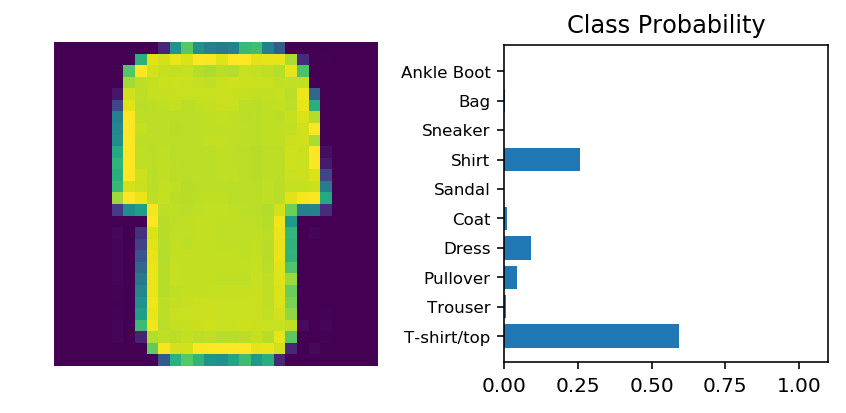

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')